<a href="https://colab.research.google.com/github/hainmit09/DataAnalysis/blob/main/B%C3%A0i_1_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# sử dụng thư viện pandas để làm việc với dữ liệu dạng bảng
import pandas as pd
# đọc dữ liệu, file dữ liệu thường có encoding = 'UTF-8' hoặc 'ISO-8859-1'
data=pd.read_csv('/content/subset-covid-data.csv', encoding= 'UTF-8')
# hiển thị 5 dòng dữ liệu đầu tiên
data.head()

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0


In [18]:
# Số lượng dòng và cột của bộ dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


In [19]:
# Tìm hiểu xem dữ liệu được thống kê cho những ngày nào
data.date.value_counts()

2020-04-12    204
2020-04-11      1
2020-01-18      1
Name: date, dtype: int64

In [20]:
# lọc dữ liệu nhiễu:
cleaned_data = data[data.date == '2020-04-12']

trung bình số ca mắc mới: 376.8186274509804
trung vị của số ca mắc mới: 11.5


Text(0, 0.5, 'Số lượng quốc gia')

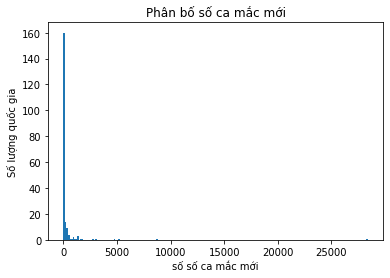

In [21]:
# Vẽ biểu đồ phân bố số lượng ca mắc mới ở các quốc gia
print ("trung bình số ca mắc mới: " + str(cleaned_data.cases.mean()))
print ("trung vị của số ca mắc mới: "+ str(cleaned_data.cases.median()))
import matplotlib.pyplot as plt
plt.hist(cleaned_data.cases, bins = 200)
plt.title("Phân bố số ca mắc mới")
plt.xlabel("số số ca mắc mới")
plt.ylabel("Số lượng quốc gia")

In [22]:
print("tổng số ca nhiễm và số ca ncủa các châu lục")
cleaned_data.groupby(['continent'])['cases','deaths'].sum()

tổng số ca nhiễm và số ca ncủa các châu lục


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,cases,deaths
continent,,
Africa,714,52
America,33519,2111
Asia,12979,383
Europe,29591,2966
Oceania,68,4


In [23]:
print ("5 quốc gia có số ca nhiễm mới cao nhất")
data = data.sort_values('cases',ascending = False)
data.head(5)

5 quốc gia có số ca nhiễm mới cao nhất


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
190,Turkey,Asia,2020-04-12,12,4,2020,5138,95,TUR,82319724.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0


In [24]:
print ("5 quốc gia có số ca tử vong cao nhất")
data = data.sort_values('deaths',ascending = False)
data.head(5)

5 quốc gia có số ca tử vong cao nhất


,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

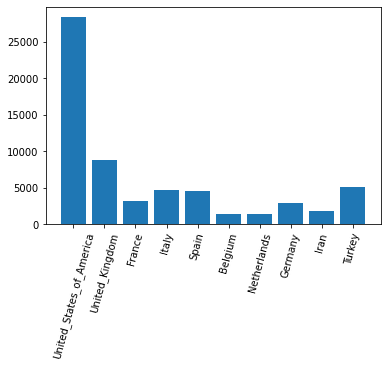

In [30]:
top10 = data.head(10)
plt.bar(x=top10['country'], height=top10['cases'])
plt.xticks(rotation=75)